<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Aluno(a): Gabriel Damazio <br/>
Aluno(a): Wendell Moreira Guindani <br/>
Aluno(a): Guilherme Augusto <br/>
Aluno(a): Igor Pierote <br/>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
dfratings = pd.read_csv('/content/ratings.csv')

In [29]:
dflinks = pd.read_csv('/content/links.csv')
dfmovies = pd.read_csv('/content/movies.csv')
dfratings = pd.read_csv('/content/ratings.csv')
dftags = pd.read_csv('/content/tags.csv')

# Exercicio 1

## A)

Extraindo o ano do filme através do titulo

In [30]:
def extract_year(title):
    if "(" in title and ")" in title[-6:]:
        year_str = title.strip()[-5:-1]
        if year_str.isdigit():
            return int(year_str)
    return None

dfmovies["year"] = dfmovies["title"].apply(extract_year)

Fazendo os calculos para gerar uma corelação

In [31]:
# Média de avaliações por filme
avg_ratings = dfratings.groupby("movieId")["rating"].mean().reset_index()
avg_ratings.rename(columns={"rating": "avg_rating"}, inplace=True)

# Juntar com dados dos filmes
movies_with_ratings = pd.merge(dfmovies, avg_ratings, on="movieId")

# Remover filmes sem ano
movies_with_ratings = movies_with_ratings.dropna(subset=["year"])

# Calcular a correlação
correlation = movies_with_ratings["year"].corr(movies_with_ratings["avg_rating"])
print(f"Correlação entre ano e avaliação média: {correlation:.2f}")

Correlação entre ano e avaliação média: -0.11


A correlação entre o ano de lançamento do filme e sua avaliação média é aproximadamente -0.11.

Isso indica uma correlação negativa fraca — ou seja, filmes mais antigos tendem a ter avaliações um pouco mais altas, mas essa tendência é muito fraca e pode não ser significativa.

# B)

Coletando as informações de 'ratings'

In [32]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Coletandos as informções de 'tags'

In [33]:
dftags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Contagem de usuários distintos

In [34]:
usuarios_avaliacoes = dfratings['userId'].nunique()
usuarios_tags = dftags['userId'].nunique()

Mostrando usuários únicos em cada tabela

In [35]:
print("Usuários que avaliaram:", usuarios_avaliacoes)
print("Usuários que rotularam:", usuarios_tags)

Usuários que avaliaram: 610
Usuários que rotularam: 58


Exibindo o mais disperso

In [36]:
if usuarios_avaliacoes > usuarios_tags:
    print("O grupo mais disperso é o de usuários que avaliaram filmes.")
else:
    print("O grupo mais disperso é o de usuários que rotularam filmes.")

O grupo mais disperso é o de usuários que avaliaram filmes.


# C)

Coletando as informações das categoria

In [37]:
dftags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Separando os categoria em linhas individuais

In [38]:
categoria_explodidos = dftags['tag'].str.split('|').explode()

Contando as ocorrências de cada categoria

In [39]:
contagem_categoria = categoria_explodidos.value_counts()

Extraindo o categoria mais frequente

In [40]:
genero_mais_frequente = contagem_categoria.idxmax()
quantidade = contagem_categoria.max()
print(f"Categoria mais frequente: {genero_mais_frequente} (aparece {quantidade} vezes)")

Categoria mais frequente: In Netflix queue (aparece 131 vezes)


Acrescentando um gráfico

<ipython-input-41-587b145ce2a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_categoria.values[:10], y=contagem_categoria.index[:10], palette='coolwarm')


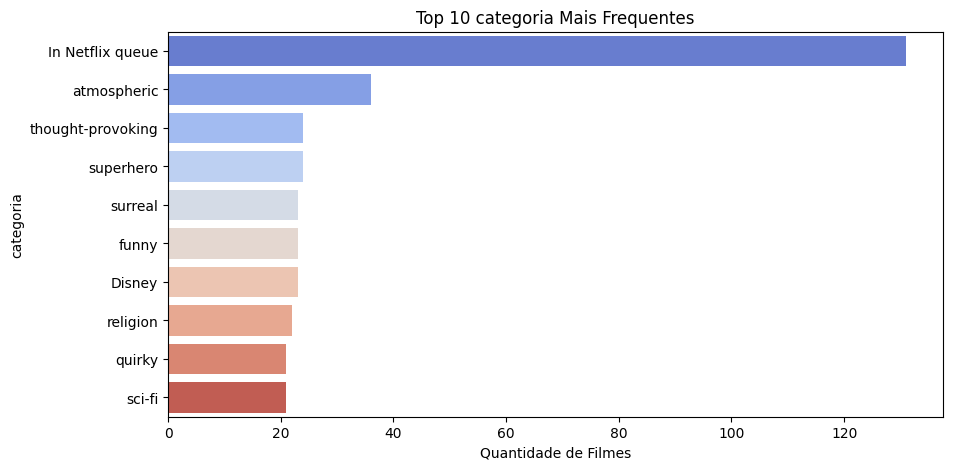

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(x=contagem_categoria.values[:10], y=contagem_categoria.index[:10], palette='coolwarm')
plt.title('Top 10 categoria Mais Frequentes')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('categoria')
plt.show()

# D)

In [42]:
#Aqui vamos entender a base de dados aferindo as informações presente nela
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [43]:
#Vizualizando as primeiras linhas da base de dados e convertendo a data de timestamp para datetime
dfratings['timestamp'] = pd.to_datetime(dfratings['timestamp'], unit='s')
dfratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [44]:
#Aqui extraimos o ano de cada uma das avaliações e criamos uma coluna especifica para isso
dfratings['ano'] = dfratings['timestamp'].dt.year
dfratings.head()

,userId,movieId,rating,timestamp,ano
0,1,1,4.0,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,2000


In [45]:
#Verificando os anos que estão dentro do escopo de analise
valores_unicos = dfratings['ano'].unique()
print(valores_unicos)

[2000 2015 2011 2001 1999 1996 2005 2006 2007 2003 2016 1998 2009 2017
 2013 2012 2018 2014 2010 1997 2004 2002 2008]


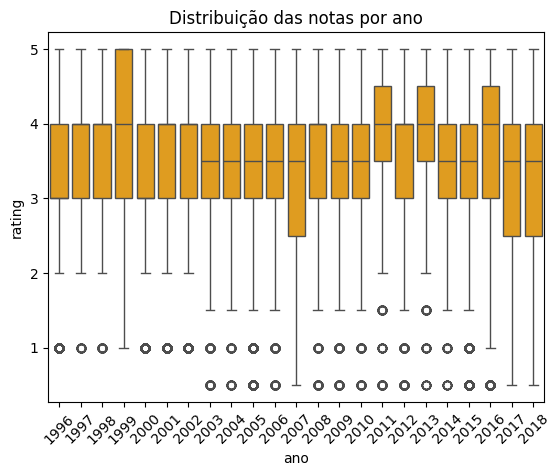

In [46]:
#Aqui usamos um gráfico boxplot para demonstrar como as notas está distribuidas ao longo dos anos
sns.boxplot(data=dfratings, x='ano', y='rating', color='orange')
plt.title('Distribuição das notas por ano')
plt.xticks(rotation=45)
plt.show()

Acima é possível observar um gráfico que demonstra a distribuição das notas ao longo dos anos

# Questão 2


## Perguntas sobre a base de dados 'ratings'

### 1) Qual ano possui a maior média de notas da base de dados?

In [47]:
df_media = dfratings.groupby('ano')['rating'].mean().reset_index()

In [48]:
df_media.head(199).sort_values('rating',ascending=False)

,ano,rating
17,2013,3.877404
15,2011,3.784024
3,1999,3.772448
1,1997,3.727557
20,2016,3.686334
12,2008,3.656746
16,2012,3.641323
6,2002,3.606958
0,1996,3.535927
19,2015,3.513830


In [49]:
df_media.nlargest(1, 'rating')[['ano', 'rating']]

,ano,rating
17,2013,3.877404


Logo o ano com a maior média de anos foi 2013, com a média 3.877404

### 2) Qual ano ocorreu o maior numero de avaliações?

In [50]:
dfratings.describe()

,userId,movieId,rating,timestamp,ano
count,100836.000000,100836.000000,100836.000000,100836,100836.000000
mean,326.127564,19435.295718,3.501557,2008-03-19 17:01:27.368469248,2007.722936
min,1.000000,1.000000,0.500000,1996-03-29 18:36:55,1996.000000
25%,177.000000,1199.000000,3.000000,2002-04-18 09:57:46,2002.000000
50%,325.000000,2991.000000,3.500000,2007-08-02 20:31:02,2007.000000
75%,477.000000,8122.000000,4.000000,2015-07-04 07:15:44.500000,2015.000000
max,610.000000,193609.000000,5.000000,2018-09-24 14:27:30,2018.000000
std,182.618491,35530.987199,1.042529,NaN,6.890376


In [51]:
contagem_por_ano = dfratings.groupby('ano').size().reset_index(name='total_avaliacoes')
contagem_por_ano.nlargest(1, 'total_avaliacoes')[['ano', 'total_avaliacoes']]

,ano,total_avaliacoes
4,2000,10061


In [52]:
contagem_por_ano.head(199).sort_values('total_avaliacoes',ascending=False)

,ano,total_avaliacoes
4,2000,10061
21,2017,8198
11,2007,7114
20,2016,6703
19,2015,6616
22,2018,6418
0,1996,6040
9,2005,5813
16,2012,4656
12,2008,4351


Logo o maior numero de avaliações ocorreu no ano 2000, sendo que foram feitas 10061 avaliações esse ano.

## Perguntas sobre a base de dados 'links'

### 1) Nessa banco de dados, há algum filme que não contenha uma avaliação em algum site de avaliações?

In [53]:
# Verificar quais colunas têm dados faltando (NaN)
missing_data = dflinks.isna().sum()

# Filtrar apenas as colunas que possuem valores faltando
columns_with_na = missing_data[missing_data > 0]

columns_with_na

,0
tmdbId,8


Sim, existem dados faltantes na coluna tmdbId

### 2)Quais são os dados faltantes e de qual coluna eles pertencem?

In [54]:
# Obter os IDs dos registros que têm dados faltando
rows_with_na = dflinks[dflinks.isna().any(axis=1)]

columns_with_na, rows_with_na["movieId"].tolist()


(tmdbId    8
 dtype: int64,
 [791, 1107, 2851, 4051, 26587, 32600, 40697, 79299])

Os filmes com ID 791, 1107, 2851, 4051, 26587, 32600, 40697, 79299, não possuem tmbdid.

## Perguntas sobre a base de dados 'movies'

###1)Qual o filme mais antigo do catálogo?

Removendo filme sem ano registrado

In [55]:
df_com_ano = dfmovies.dropna(subset=['year'])

Encontrar o menor ano

In [56]:
ano_mais_antigo = df_com_ano['year'].min()

Filtrar filmes que possuam esse ano

In [57]:
filmes_mais_antigos = df_com_ano[df_com_ano['year'] == ano_mais_antigo]

Mostrando os filmes

In [58]:
print(f"Filme(s) mais antigo(s) do catálogo ({int(ano_mais_antigo)}):")
print(filmes_mais_antigos[['title', 'year']])

Filme(s) mais antigo(s) do catálogo (1902):
                                                  title    year
5868  Trip to the Moon, A (Voyage dans la lune, Le) ...  1902.0


###2)Qual o título mais extenso?

Contando os caracteres de cada título

In [59]:
dfmovies['title_length'] = dfmovies['title'].str.len()

Encontrando o mais longo

In [60]:
titulo_mais_extenso = dfmovies.loc[dfmovies['title_length'].idxmax()]

Exibindo o título de maior comprimento

In [61]:
print(f"Título mais extenso ({titulo_mais_extenso['title_length']} caracteres):")
print(titulo_mais_extenso['title'])

Título mais extenso (158 caracteres):
Dragon Ball Z the Movie: The World's Strongest (a.k.a. Dragon Ball Z: The Strongest Guy in The World) (Doragon bôru Z: Kono yo de ichiban tsuyoi yatsu) (1990)


## Perguntas sobre a base de dados 'tags'

###1)Todos os filmes possuem tags associadas, ou existem filmes sem nenhuma tag?



In [62]:
# Verificar filmes sem tags
filmes_sem_tags = dftags['movieId'].isnull().sum()

# Exibir o resultado
print(f"Número de filmes sem tags: {filmes_sem_tags}")

Número de filmes sem tags: 0


###2) Quais IDs de filmes específicos (se houver) estão faltando informações de tags

In [64]:
# Carregar os arquivos movies.csv e tags.csv
df_movies = pd.read_csv('/content/movies.csv')
df_tags = pd.read_csv('/content/tags.csv')

# Mesclar os dataframes para ter acesso aos gêneros e tags
df_merged = pd.merge(df_movies, df_tags, on='movieId')

# Função para extrair os gêneros de uma string de gêneros
def extrair_generos(generos_str):
    return generos_str.split('|')

# Aplicar a função para criar uma coluna com os gêneros separados
df_merged['generos'] = df_merged['genres'].apply(extrair_generos)

# Explodir a coluna de gêneros para ter uma linha para cada gênero por filme
df_exploded = df_merged.explode('generos')

# Agrupar por gênero e tag, contar as ocorrências e encontrar a tag mais comum
tag_mais_comum_por_genero = df_exploded.groupby('generos')['tag'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Renomear as colunas para melhor clareza
tag_mais_comum_por_genero.columns = ['genero', 'tag mais comum']

# Exibir os resultados
print("A tag mais comum para cada gênero de filme é:")
print(tag_mais_comum_por_genero)

A tag mais comum para cada gênero de filme é:
                genero    tag mais comum
0   (no genres listed)            quirky
1               Action         superhero
2            Adventure         superhero
3            Animation            Disney
4             Children            Disney
5               Comedy  In Netflix queue
6                Crime  In Netflix queue
7          Documentary  In Netflix queue
8                Drama  In Netflix queue
9              Fantasy            Disney
10           Film-Noir  In Netflix queue
11              Horror            ghosts
12                IMAX            sci-fi
13             Musical            Disney
14             Mystery      twist ending
15             Romance  In Netflix queue
16              Sci-Fi            sci-fi
17            Thriller       atmospheric
18                 War           Vietnam
19             Western  In Netflix queue
